## Bayesian Semi-Supervised Causal Learning
This notebook contains some numerical examples

(c) Bernhard Geiger, Know-Center, 2024

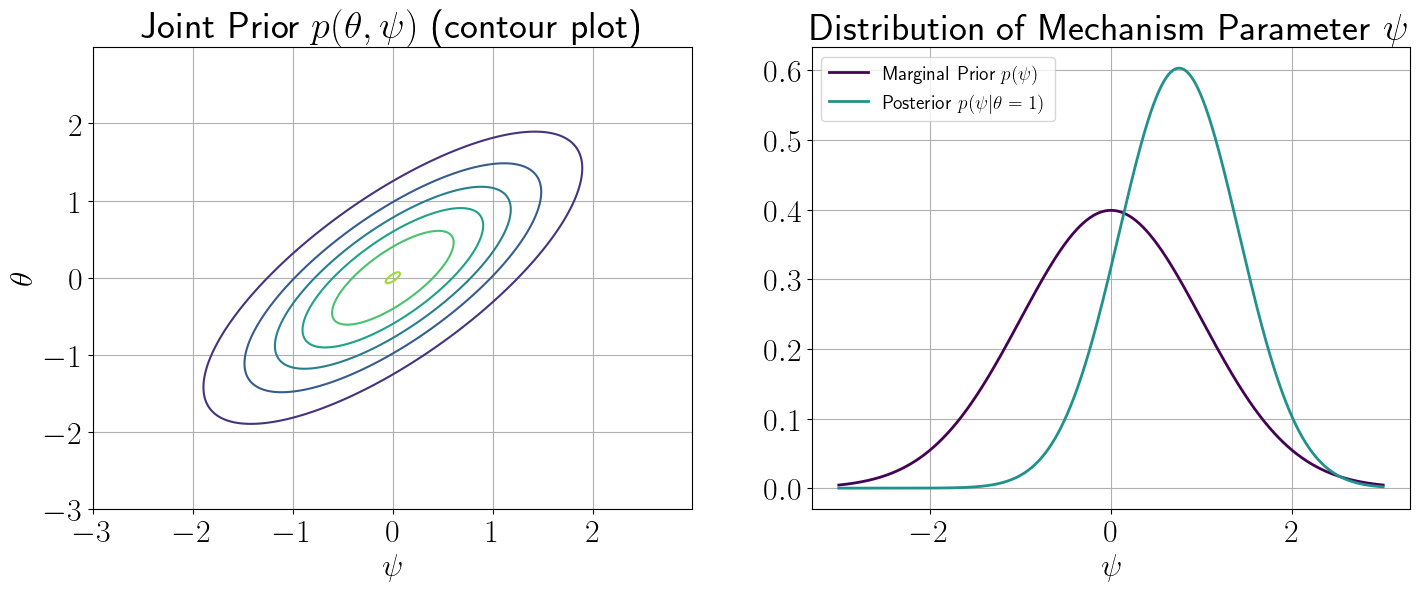

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

plt.rcParams.update({'font.size': 23})

# Set mean and covariance matrix for the jointly Gaussian RVs

rho=0.75
mu = 0  # mean
sigma = 1  # standard deviation

mean = [mu, mu]
covariance = [[sigma, rho], [rho, sigma]]

# Generate grid points for the contour plot
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Create a multivariate normal distribution with the given mean and covariance
rv = multivariate_normal(mean, covariance)

# Calculate the joint PDF values for the grid points
pdf_values = rv.pdf(pos)
plt.rcParams['text.usetex'] = True

# Plot the joint PDF as a contour plot
plt.figure(figsize=(17, 6))
plt.subplot(1,2,1)
plt.contour(x, y, pdf_values, cmap='viridis')
plt.ylabel('$\\theta$')
plt.xlabel('$\\psi$')
plt.title('Joint Prior $p(\\theta,\psi)$ (contour plot)')
plt.grid(True)




# Generate a range of x values
x = np.linspace(-3, 3, 1000)

# Calculate the PDF values for the given x values
pdf_values = norm.pdf(x, loc=mu, scale=sigma)

cond_pdf_values = norm.pdf(x, loc=mu+rho*(1-mu), scale=np.sqrt(1-rho**2)*sigma)

# Plot the PDF
plt.subplot(1,2,2)
plt.plot(x, pdf_values, linewidth=2, label='Marginal Prior $p(\psi)$',color=plt.cm.viridis(1))
plt.plot(x, cond_pdf_values, linewidth=2, label='Posterior $p(\psi|\\theta=1)$',color=plt.cm.viridis(0.5))
plt.xlabel('$\psi$')
plt.title('Distribution of Mechanism Parameter $\psi$')
plt.legend(fontsize=14)
plt.grid(True)
plt.axis('tight')
plt.savefig('distributions.pdf', bbox_inches='tight')
plt.show()

### Bayesian Inference without Pre-Training on Unlabeled Data -- True Parameters are Fixed

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def definePrior(mu,rho,sigma=1):
    mean = [mu, mu]
    covariance = [[sigma, rho], [rho, sigma]]
    return mean, covariance

In [4]:
# sigma=[[1,0],[0,0.1]] # likelihood
sigma=[[3,0],[0,1]] # likelihood
reps=1000
mean_true=np.array([1,3])
sigma_true=sigma


In [5]:
N_list=[1,2,3, 4, 5,10,15,20,30,40,50,75,100,200]
rho_list=[0, 0.25, 0.75, 0.9, 0.95]
colors = plt.cm.viridis(np.linspace(0.15, 0.85, len(rho_list)))

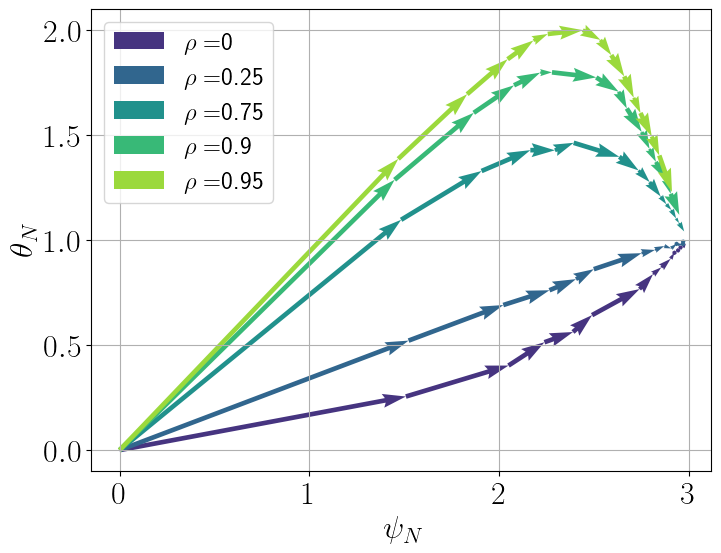

In [6]:
plt.figure(figsize=(8, 6))
for rho_ind in range(len(rho_list)):
    rho=rho_list[rho_ind]
    mean_0,sigma_0=definePrior(0,rho)
    error=[]
    psi_list=[mean_0[1]]
    theta_list=[mean_0[0]]
    for N in N_list:
        psi_vec=np.zeros(reps)
        theta_vec=np.zeros(reps)
        for ind in range(reps):
            s = np.random.multivariate_normal(mean_true, sigma_true, N)
            x_bar=np.mean(s,axis=0)
            sigma_N=np.linalg.inv(np.linalg.inv(sigma_0)+N*np.linalg.inv(sigma))
            mean_N=np.inner(sigma_N,(N*np.inner(np.linalg.inv(sigma),x_bar)+np.inner(np.linalg.inv(sigma_0),mean_0)))
            psi_vec[ind]=mean_N[1]
            theta_vec[ind]=mean_N[0]
        error.append(np.mean((psi_vec-mean_true[1])**2+(theta_vec-mean_true[0])**2))
        psi_list.append(np.mean(psi_vec))
        theta_list.append(np.mean(theta_vec))
    plt.quiver(psi_list[:-1], theta_list[:-1], np.array(psi_list[1:])-np.array(psi_list[:-1]), np.array(theta_list[1:])-np.array(theta_list[:-1]), scale_units='xy', angles='xy', scale=1,label='$\\rho=$'+str(rho),color=colors[rho_ind])
plt.grid(True)
plt.axis('tight')
plt.xlabel('$\\psi_N$')
plt.ylabel('$\\theta_N$')
plt.legend(fontsize=18,loc='upper left')
plt.savefig('good_case_no_pretraining.pdf', bbox_inches='tight')
plt.show()

In [7]:
mean_true=np.array([1,-3])

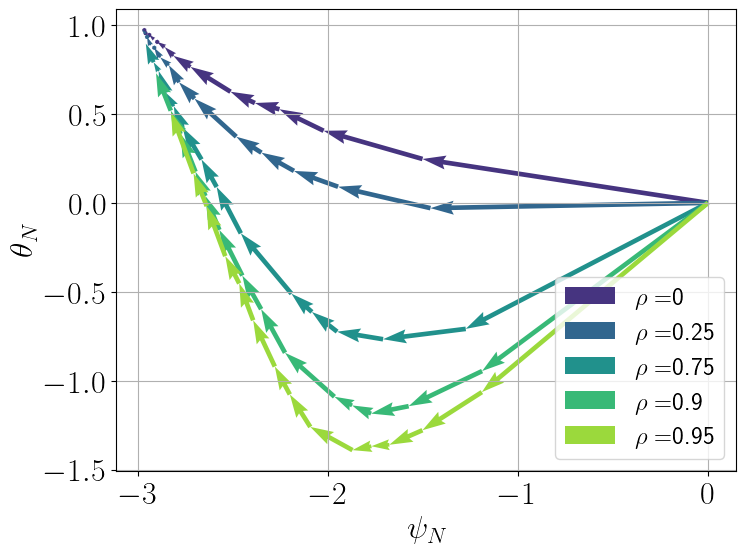

In [8]:
plt.figure(figsize=(8, 6))
for rho_ind in range(len(rho_list)):
    rho=rho_list[rho_ind]
    mean_0,sigma_0=definePrior(0,rho)
    error=[]
    psi_list=[mean_0[1]]
    theta_list=[mean_0[0]]
    for N in N_list:
        psi_vec=np.zeros(reps)
        theta_vec=np.zeros(reps)
        for ind in range(reps):
            s = np.random.multivariate_normal(mean_true, sigma_true, N)
            x_bar=np.mean(s,axis=0)
            sigma_N=np.linalg.inv(np.linalg.inv(sigma_0)+N*np.linalg.inv(sigma))
            mean_N=np.inner(sigma_N,(N*np.inner(np.linalg.inv(sigma),x_bar)+np.inner(np.linalg.inv(sigma_0),mean_0)))
            psi_vec[ind]=mean_N[1]
            theta_vec[ind]=mean_N[0]
        error.append(np.mean((psi_vec-mean_true[1])**2+(theta_vec-mean_true[0])**2))
        psi_list.append(np.mean(psi_vec))
        theta_list.append(np.mean(theta_vec))
    plt.quiver(psi_list[:-1], theta_list[:-1], np.array(psi_list[1:])-np.array(psi_list[:-1]), np.array(theta_list[1:])-np.array(theta_list[:-1]), scale_units='xy', angles='xy', scale=1,label='$\\rho=$'+str(rho),color=colors[rho_ind])
plt.grid(True)
plt.axis('tight')
plt.xlabel('$\\psi_N$')
plt.ylabel('$\\theta_N$')
plt.legend(fontsize=18,loc='lower right')
plt.savefig('bad_case_no_pretraining.pdf', bbox_inches='tight')
plt.show()

### Bayesian Inference without Pre-Training on Unlabeled Data -- Sample from Independent Prior

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [10]:
def definePrior(mu,rho,sigma=1):
    mean = [mu, mu]
    covariance = [[sigma, rho], [rho, sigma]]
    return mean, covariance

In [11]:
# sigma=[[1,0],[0,0.1]] # likelihood
sigma=[[3,0],[0,1]] # likelihood
reps=10000
sigma_true=sigma

In [12]:
N_list=[1,2,3,4,5,7,10,20,30,50,100,200,500,1000]
rho_list=[0, 0.25, 0.75, 0.9, 0.95]
colors = plt.cm.viridis(np.linspace(0.15, 0.85, len(rho_list)))

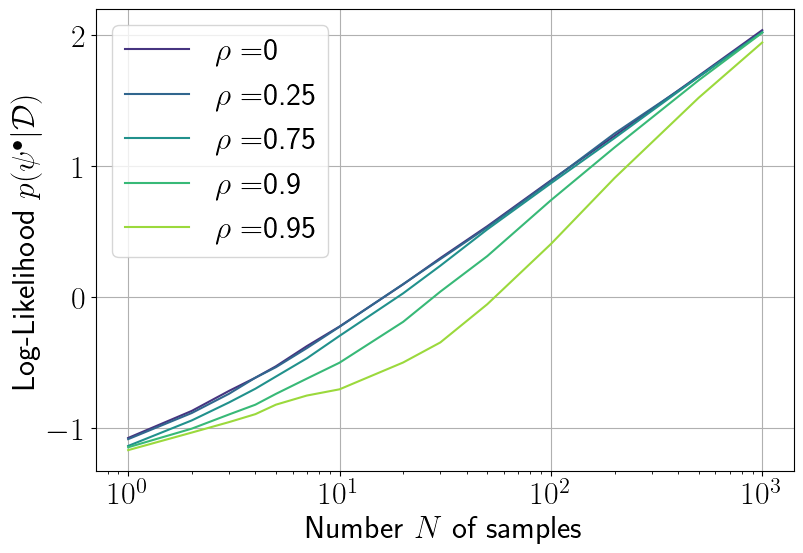

In [13]:
plt.figure(figsize=(9, 6))
for rho_ind in range(len(rho_list)):
    rho=rho_list[rho_ind]
    mean_0,sigma_0=definePrior(0,rho)
    error=[]
    LL=[]
    LL_psi=[]
    for ind_N in range(len(N_list)):
        N=N_list[ind_N]
        error_vec=np.zeros(reps)
        LL_vec=np.zeros(reps)
        LL_psi_vec=np.zeros(reps)
        for ind in range(reps):
            mean_true = np.array([np.random.normal(mean_0[0],sigma_0[0][0]), np.random.normal(mean_0[1],sigma_0[1][1])])
            s = np.random.multivariate_normal(mean_true, sigma_true, N)
            x_bar=np.mean(s,axis=0)
            sigma_N=np.linalg.inv(np.linalg.inv(sigma_0)+N*np.linalg.inv(sigma))
            mean_N=np.inner(sigma_N,(N*np.inner(np.linalg.inv(sigma),x_bar)+np.inner(np.linalg.inv(sigma_0),mean_0)))
            psi_vec=mean_N[1]
            theta_vec=mean_N[0]
            error_vec[ind]=(psi_vec-mean_true[1])**2+(theta_vec-mean_true[0])**2
            LL_vec[ind]=multivariate_normal.logpdf(mean_true,mean=mean_N,cov=sigma_N)
            LL_psi_vec[ind]=multivariate_normal.logpdf(mean_true[1],mean=mean_N[1],cov=sigma_N[1][1])
        error.append(np.mean(error_vec))
        LL.append(np.mean(LL_vec))
        LL_psi.append(np.mean(LL_psi_vec))
    plt.semilogx(N_list,LL_psi,label='$\\rho=$'+str(rho),color=colors[rho_ind])
plt.grid(True)
plt.axis('tight')
plt.xlabel('Number $N$ of samples')
plt.ylabel('Log-Likelihood $p(\\psi^\\bullet|\\mathcal{D})$')
plt.legend()
plt.savefig('supervised_random.pdf', bbox_inches='tight')
plt.show()

### Bayesian Semi-Supervised Inference -- Sample from Independent Prior

In [14]:
rho_list=[0,0.9]
colors = colors[[0,-2]]
M_list=[0.1,1,10]
linestyles=['-','--','-.']

C:\Users\bgeiger\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\bgeiger\AppData\Local\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


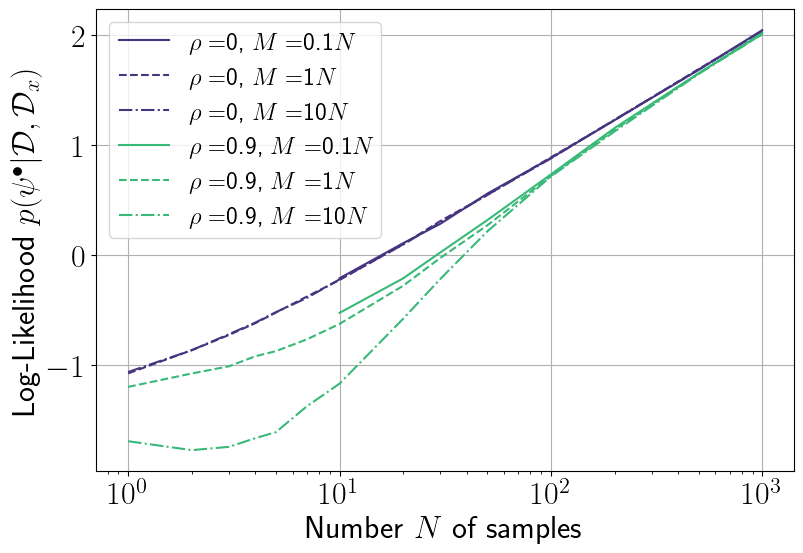

In [15]:
plt.figure(figsize=(9, 6))
for rho_ind in range(len(rho_list)):
    rho=rho_list[rho_ind]
    mean_0,sigma_0=definePrior(0,rho)
    for ind_M in range(len(M_list)):
        error=[]
        LL=[]
        LL_psi=[]
        for ind_N in range(len(N_list)):
            N=N_list[ind_N]
            M=int(N*M_list[ind_M])
            error_vec=np.zeros(reps)
            LL_vec=np.zeros(reps)
            LL_psi_vec=np.zeros(reps)
            for ind in range(reps):
                mean_true = np.array([np.random.normal(mean_0[0],sigma_0[0][0]), np.random.normal(mean_0[1],sigma_0[1][1])])
                s = np.random.multivariate_normal(mean_true, sigma_true, M)
                x_bar=np.mean(s,axis=0)
                sigma_M=np.linalg.inv(np.linalg.inv(sigma_0)+M*np.array([[0.2, 0],[0, 0]]))
                mean_M=np.inner(sigma_M,(M*np.inner(np.array([[0.2, 0],[0, 0]]),x_bar)+np.inner(np.linalg.inv(sigma_0),mean_0)))

                s = np.random.multivariate_normal(mean_true, sigma_true, N)
                x_bar=np.mean(s,axis=0)
                sigma_N=np.linalg.inv(np.linalg.inv(sigma_M)+N*np.linalg.inv(sigma))
                mean_N=np.inner(sigma_N,(N*np.inner(np.linalg.inv(sigma),x_bar)+np.inner(np.linalg.inv(sigma_M),mean_M)))
                psi_vec=mean_N[1]
                theta_vec=mean_N[0]
                error_vec[ind]=(psi_vec-mean_true[1])**2+(theta_vec-mean_true[0])**2
                LL_vec[ind]=multivariate_normal.logpdf(mean_true,mean=mean_N,cov=sigma_N)
                LL_psi_vec[ind]=multivariate_normal.logpdf(mean_true[1],mean=mean_N[1],cov=sigma_N[1][1])
            error.append(np.mean(error_vec))
            LL.append(np.mean(LL_vec))
            LL_psi.append(np.mean(LL_psi_vec))
        plt.semilogx(N_list,LL_psi,label='$\\rho=$'+str(rho)+', $M=$'+str(M_list[ind_M])+'$N$',color=colors[rho_ind],linestyle=linestyles[ind_M])
plt.grid(True)
plt.axis('tight')
plt.xlabel('Number $N$ of samples')
plt.ylabel('Log-Likelihood $p(\\psi^\\bullet|\\mathcal{D},\mathcal{D}_x)$')
plt.legend(fontsize=18)
plt.savefig('semi-supervised_random.pdf', bbox_inches='tight')
plt.show()

Text(0, 0.5, 'Log-Likelihood $p(\\psi^\\bullet|\\mathcal{D},\\mathcal{D}_x)$')

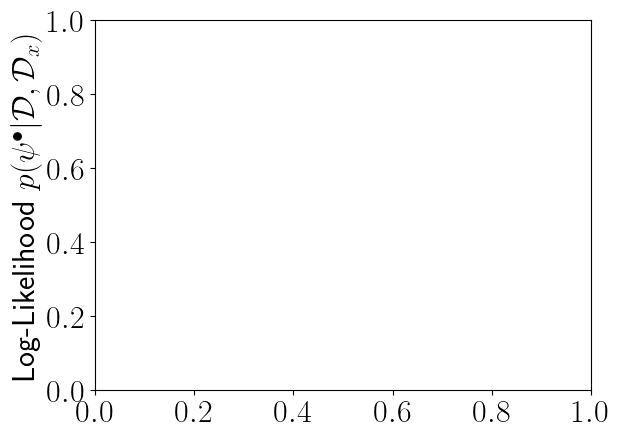

In [16]:
plt.ylabel('Log-Likelihood $p(\\psi^\\bullet|\\mathcal{D},\mathcal{D}_x)$')